# Linear Regression Model with more than 5 predictors (3 combinations)

<ul>
    <li>Only transform y-variable</li>
    <li>Only transform one x-variable (try all and pick the best one named var1)</li>
    <li>Add more transformed x-variables in addition to var1</li>
    <li>Polynomial regression with size 2</li>
</ul>

Source: https://blog.majestic.com/case-studies/correlation-data-transformations/

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data = pd.read_csv("cleaned_dataset.csv")
data.describe()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,8.940000e+02,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000,894.000000
mean,4.782378e+09,8030.912752,5.772170,0.113737,1.580000,0.596745,3.512718,0.001689,22.253915,14.262864,202.733781,969.605145,2334.772931
std,2.434238e+09,4904.332852,3.816237,0.635163,2.704044,0.896373,1.942749,0.007524,33.317996,20.251145,102.564675,289.746307,714.929899
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,4505.250000,3.085000,0.000000,0.000000,0.000000,2.202500,0.000000,0.000000,0.000000,140.000000,725.250000,1849.250000
50%,4.445115e+09,7818.500000,5.440000,0.000000,0.340000,0.275000,3.510000,0.000000,6.000000,8.000000,205.000000,1038.500000,2187.500000
75%,6.962181e+09,10977.500000,7.800000,0.000000,2.197500,0.830000,4.877500,0.000000,34.000000,20.000000,269.750000,1201.000000,2809.750000
max,8.877689e+09,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


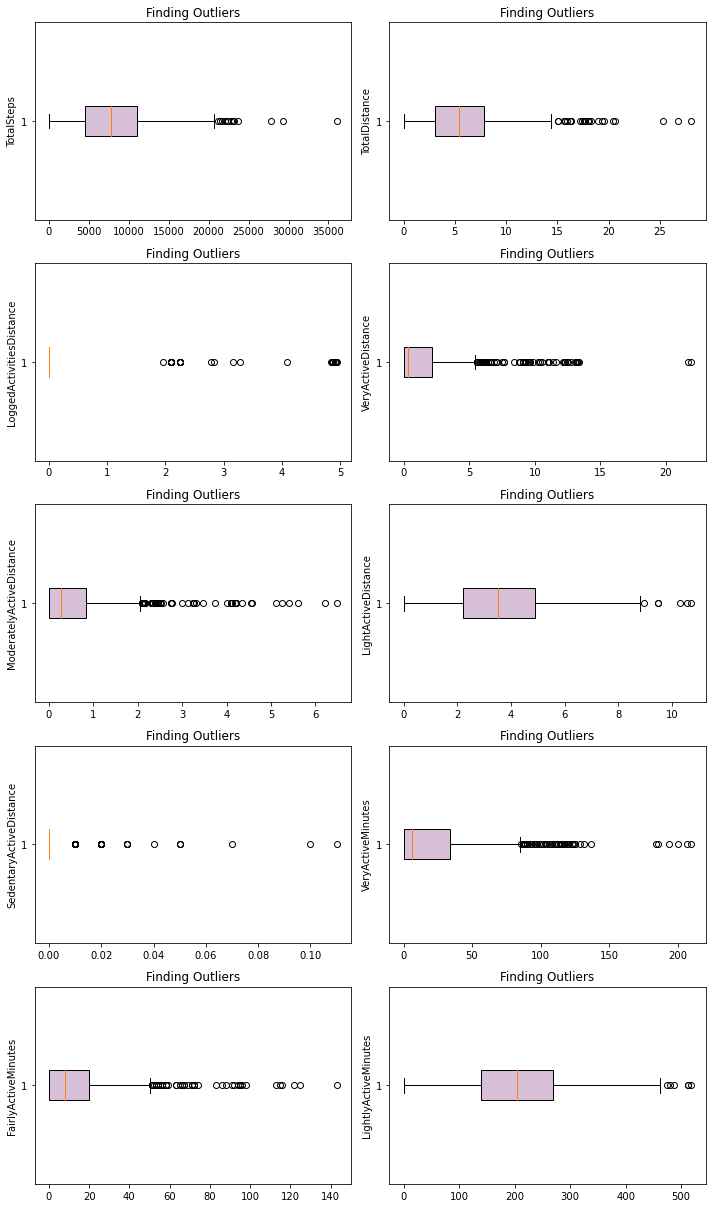

In [3]:
# draw boxplots to identify outliers

# data that we want to plot
plot_data = [data.TotalSteps, data.TotalDistance, data.LoggedActivitiesDistance, data.VeryActiveDistance, \
             data.ModeratelyActiveDistance, data.LightActiveDistance, data.SedentaryActiveDistance, \
             data.VeryActiveMinutes, data.FairlyActiveMinutes, data.LightlyActiveMinutes, data.SedentaryMinutes]

# list out the columns
label = list(data.columns)

# remove the columns we don't want
label.remove('Id') 
label.remove('ActivityDate') 
label.remove('Calories') 

# plot the boxplots
plt.figure(figsize=(10, 20)) 

for i in range(10):
    plt.subplot(6,2,i+1)
    plt.boxplot(plot_data[i], patch_artist=True, boxprops=dict(facecolor='thistle'),vert=0)
    plt.ylabel(label[i])
    plt.title('Finding Outliers')

plt.tight_layout()
plt.show()

In [4]:
from scipy import stats

# add a z-score to the data and then remove the outliers
data_out = data.copy()
data_out['z_score'] = stats.zscore(data_out.TotalDistance)
data_out = data_out.loc[data_out['z_score'].abs()<=3]

In [5]:
# take the log of calories column, add 1 to deal with 0 values
log_label = np.log1p(data.Calories)

# take the log of total distance column, add 1 to deal with 0 values
logTotDist = np.log1p(data.TotalDistance)
data['logTotDist'] = logTotDist

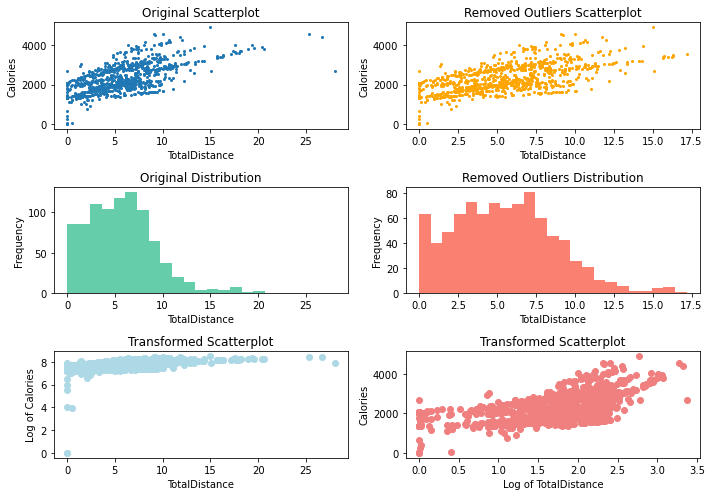

In [6]:
# graph the data of TotalDistance with and without outliers
plt.figure(figsize=(10, 7)) 

plt.subplot(3,2,1)
plt.scatter(data.TotalDistance, data.Calories, s=4)
plt.ylabel('Calories')
plt.xlabel('TotalDistance')
plt.title('Original Scatterplot')

plt.subplot(3,2,2)
plt.scatter(data_out.TotalDistance, data_out.Calories, s=4, color='orange')
plt.ylabel('Calories')
plt.xlabel('TotalDistance')
plt.title('Removed Outliers Scatterplot')

plt.subplot(3,2,3)
plt.hist(data.TotalDistance, bins=23, color='mediumaquamarine')
plt.ylabel('Frequency')
plt.xlabel('TotalDistance')
plt.title('Original Distribution')

plt.subplot(3,2,4)
plt.hist(data_out.TotalDistance, bins=23, color='salmon')
plt.ylabel('Frequency')
plt.xlabel('TotalDistance')
plt.title('Removed Outliers Distribution')

plt.subplot(3,2,5)
plt.scatter(data.TotalDistance, log_label, color='lightblue')
plt.ylabel('Log of Calories')
plt.xlabel('TotalDistance')
plt.title('Transformed Scatterplot')

plt.subplot(3,2,6)
plt.scatter(data.logTotDist, data.Calories, color='lightcoral')
plt.ylabel('Calories')
plt.xlabel('Log of TotalDistance')
plt.title('Transformed Scatterplot')

plt.tight_layout()

In [7]:
#set random_state to get the same split every time
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, log_label, test_size=0.2, random_state=10)

print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(Xtrain.shape))
print("Shape of test dataset is: {0}".format(Xtest.shape))

Shape of full dataset is: (894, 15)
Shape of training dataset is: (715, 15)
Shape of test dataset is: (179, 15)


# Model 1: Log of y-var

In [8]:
#extracting the right data
list_ = ['TotalDistance', 'LoggedActivitiesDistance', \
        'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']

X_train1 = Xtrain[list_]

X_test1 = Xtest[list_]

In [9]:
regression = LinearRegression()
regression.fit(X_train1, Ytrain)
predicted_y = regression.predict(X_test1)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 7.000855776182276
Coefficients: 
 [ 5.04853496e-02  3.64961382e-02 -2.10806678e+00  6.51804302e-04
  2.78525841e-04]


In [10]:
# calculating error 
r2_test = regression.score(X_test1, Ytest)
r2_train = regression.score(X_train1, Ytrain)
mse_test = mean_squared_error(Ytest, predicted_y)
mse_train = mean_squared_error(Ytrain, regression.predict(X_train1))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 0.35947
MSE of Train data = 0.16574
R^2 of Test = 0.12776
R^2 of Train = 0.24255


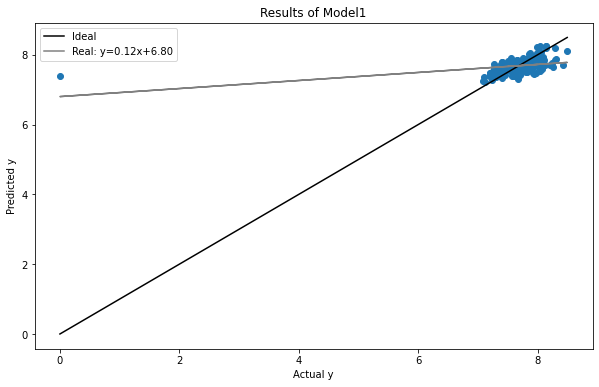

In [11]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Ytest, predicted_y, 'o')
grid0 = np.linspace(np.min(log_label), np.max(log_label), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Results of Model1")

# plotting the best fit line
m, b = np.polyfit(Ytest, predicted_y, 1)
ax.plot(Ytest, m*Ytest + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [12]:
# validity check!
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set 
X = data[list_] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

                    feature       VIF
0             TotalDistance  4.079284
1  LoggedActivitiesDistance  1.091006
2   SedentaryActiveDistance  1.089550
3      LightlyActiveMinutes  4.773667
4          SedentaryMinutes  3.082260


# Model 2: log of x-var (just Total Distance)

In [13]:
#set random_state to get the same split every time
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, data.Calories, test_size=0.2, random_state=10)

print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(Xtrain.shape))
print("Shape of test dataset is: {0}".format(Xtest.shape))

list_ = ['logTotDist', 'LoggedActivitiesDistance', \
        'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']

X_train2 = Xtrain[list_]
X_test2 = Xtest[list_]

Shape of full dataset is: (894, 15)
Shape of training dataset is: (715, 15)
Shape of test dataset is: (179, 15)


In [14]:
regression = LinearRegression()
regression.fit(X_train2, Ytrain)
predicted_y = regression.predict(X_test2)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 928.4102318314388
Coefficients: 
 [ 7.68863815e+02  1.11765842e+02 -2.82356108e+03 -1.08042014e+00
  3.03428759e-01]


In [15]:
# calculating error 
r2_test = regression.score(X_test2, Ytest)
r2_train = regression.score(X_train2, Ytrain)
mse_test = mean_squared_error(Ytest, predicted_y)
mse_train = mean_squared_error(Ytrain, regression.predict(X_train2))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 2.8472e+05
MSE of Train data = 3.0859e+05
R^2 of Test = 0.42119
R^2 of Train = 0.40038


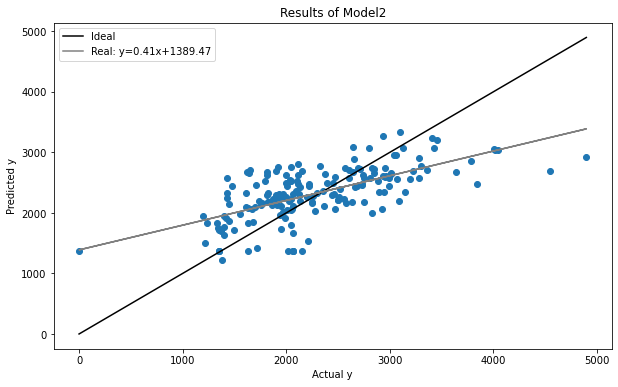

In [16]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Ytest, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Results of Model2")

# plotting the best fit line
m, b = np.polyfit(Ytest, predicted_y, 1)
ax.plot(Ytest, m*Ytest + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

# Model 3: log of all x-vars

In [17]:
list_ = ['TotalDistance', 'LoggedActivitiesDistance', \
                  'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']

# make new dataframe
logx = pd.DataFrame()
for i in range(len(list_)):
    logx[list_[i]] = np.log1p(data[list_[i]])
logx

#set random_state to get the same split every time
Xtrain, Xtest, Ytrain, Ytest = train_test_split(logx, data.Calories, test_size=0.2, random_state=10)

print("Shape of full dataset is: {0}".format(data.shape))
print("Shape of training dataset is: {0}".format(Xtrain.shape))
print("Shape of test dataset is: {0}".format(Xtest.shape))

list = ['logTotDist', 'LoggedActivitiesDistance', \
        'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']

X_train3 = Xtrain[list_]
X_test3 = Xtest[list_]

Shape of full dataset is: (894, 15)
Shape of training dataset is: (715, 5)
Shape of test dataset is: (179, 5)


In [18]:
regression = LinearRegression()
regression.fit(X_train3, Ytrain)
predicted_y = regression.predict(X_test3)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 126.48135030293724
Coefficients: 
 [  796.23228009   329.06598195 -3466.55798845  -127.75576777
   215.03542203]


In [19]:
# calculating error 
r2_test = regression.score(X_test3, Ytest)
r2_train = regression.score(X_train3, Ytrain)
mse_test = mean_squared_error(Ytest, predicted_y)
mse_train = mean_squared_error(Ytrain, regression.predict(X_train3))

print(f'MSE of Test = {mse_test:.5}')
print(f'MSE of Train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of Test = 2.7621e+05
MSE of Train data = 2.9665e+05
R^2 of Test = 0.43849
R^2 of Train = 0.42357


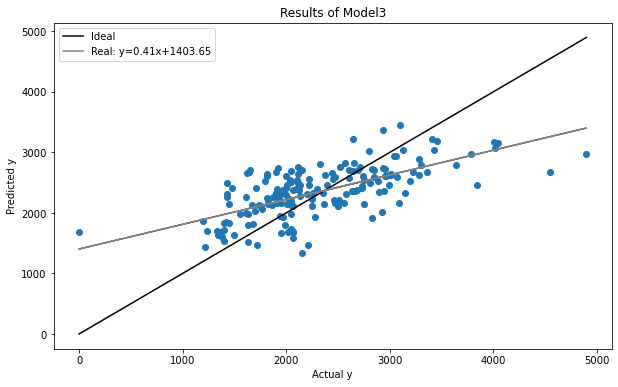

In [20]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Ytest, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Results of Model3")

# plotting the best fit line
m, b = np.polyfit(Ytest, predicted_y, 1)
ax.plot(Ytest, m*Ytest + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

In [21]:
# the independent variables set 
X = data[list_] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
print(vif_data)

                    feature       VIF
0             TotalDistance  4.079284
1  LoggedActivitiesDistance  1.091006
2   SedentaryActiveDistance  1.089550
3      LightlyActiveMinutes  4.773667
4          SedentaryMinutes  3.082260


# Model 4: polynomial regression of degree 2

In [68]:
from sklearn.preprocessing import PolynomialFeatures

list_ = ['TotalDistance', 'LoggedActivitiesDistance', \
                  'SedentaryActiveDistance','LightlyActiveMinutes', 'SedentaryMinutes']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[list_], data.Calories, test_size=0.2, random_state=10)

# training the model on the 3rd data set
transformer = PolynomialFeatures(2, include_bias=False)
expanded_Xtrain = transformer.fit_transform(Xtrain)
expanded_Xtest = transformer.fit_transform(Xtest)
pd.DataFrame(expanded_Xtrain).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,7.150000e+02
mean,5.817916,0.112846,0.001678,203.415385,968.620979,48.916380,1.102855,0.012083,1354.019522,5442.891425,0.417246,0.001155,28.841386,102.227237,0.000061,0.430056,1.734028,51669.241958,187128.493706,1.022196e+06
std,3.884499,0.636457,0.007632,101.517669,289.977383,72.084124,6.725152,0.074140,1136.447092,4066.730749,2.730079,0.020081,185.095397,611.165056,0.000626,1.940041,6.818281,43751.330572,99444.136303,5.437997e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.090000,0.000000,0.000000,139.000000,723.500000,9.548199,0.000000,0.000000,518.499985,2779.649997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19321.000000,118263.000000,5.234525e+05
50%,5.440000,0.000000,0.000000,206.000000,1045.000000,29.593601,0.000000,0.000000,1206.939960,4978.379795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42436.000000,179580.000000,1.092025e+06
75%,7.815000,0.000000,0.000000,270.000000,1199.500000,61.074451,0.000000,0.000000,1945.220002,6854.395042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72900.000000,251460.000000,1.438800e+06
max,28.030001,4.942142,0.110000,518.000000,1440.000000,785.680939,70.229391,1.068100,10849.410395,29098.079249,24.424768,0.448986,1876.057835,5341.288913,0.012100,28.200000,77.879999,268324.000000,472473.000000,2.073600e+06


In [66]:
regression = LinearRegression().fit(expanded_Xtrain, Ytrain)
regression.fit(expanded_Xtrain, Ytrain)
predicted_y = regression.predict(expanded_Xtest)

print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 -39.0597626872177
Coefficients: 
 [ 1.13674255e+03 -9.27475230e+02  1.55612175e+06 -9.16447154e+00
  5.21254298e-01  5.45109169e+00  1.05473899e+02  3.09053976e+05
 -1.71145839e+00 -2.11650462e+00 -1.67146315e+03 -6.23061376e+04
  3.96543627e+00  7.23886904e+00 -6.78474235e+07 -2.56019800e+03
 -2.77008752e+03  7.19722816e-03  3.24835054e-02  3.30342793e-03
  1.13683955e-01 -4.04290312e+00 -2.05579500e+03 -1.48556357e-02
 -6.19487317e-03  1.53883614e+01 -1.77824705e+03  5.39861705e-02
 -8.08615066e-02  2.11142855e+05 -6.09455664e+01 -2.31571411e+02
  1.10542095e-03  1.86510785e-03  1.00225714e-03 -4.94643133e+00
  2.10795164e+02  9.36115887e-01  1.12373049e+00  1.86180975e+01
  2.51497374e+02 -4.23242771e+00 -6.01581807e-03 -5.61993236e-03
 -4.66965151e-03  1.63473556e+08  3.74645010e+04  4.39433126e+04
 -3.31491255e-01  2.38021792e+00  1.19487740e+00  2.79973028e-06
 -2.41129310e-05 -1.94723252e-05 -1.95225584e-06]


In [67]:
# calculating error 
r2_test = regression.score(expanded_Xtest, Ytest)
r2_train = regression.score(expanded_Xtrain, Ytrain)
mse_test = mean_squared_error(predicted_y, Ytest)
mse_train = mean_squared_error(Ytrain, regression.predict(expanded_Xtrain))

print(f'MSE of test data = {mse_test:.5}')
print(f'MSE of train data = {mse_train:.5}')
print(f'R^2 of Test = {r2_test:.5}')
print(f'R^2 of Train = {r2_train:.5}')

MSE of test data = 3.4683e+06
MSE of train data = 2.2705e+05
R^2 of Test = -6.0508
R^2 of Train = 0.55883


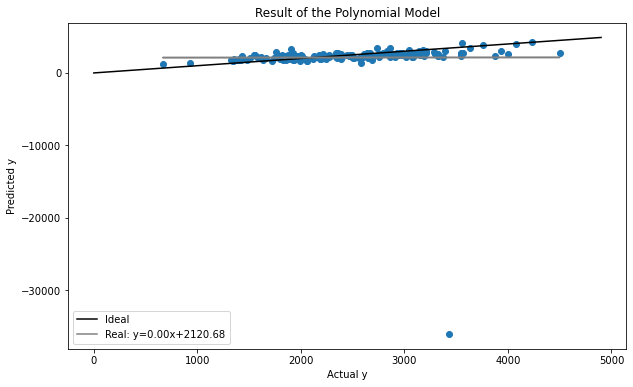

In [64]:
# plotting the y versus the predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Ytest, predicted_y, 'o')
grid0 = np.linspace(np.min(data.Calories), np.max(data.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Result of the Polynomial Model")

# plotting the best fit line
m, b = np.polyfit(Ytest, predicted_y, 1)
ax.plot(Ytest, m*Ytest + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

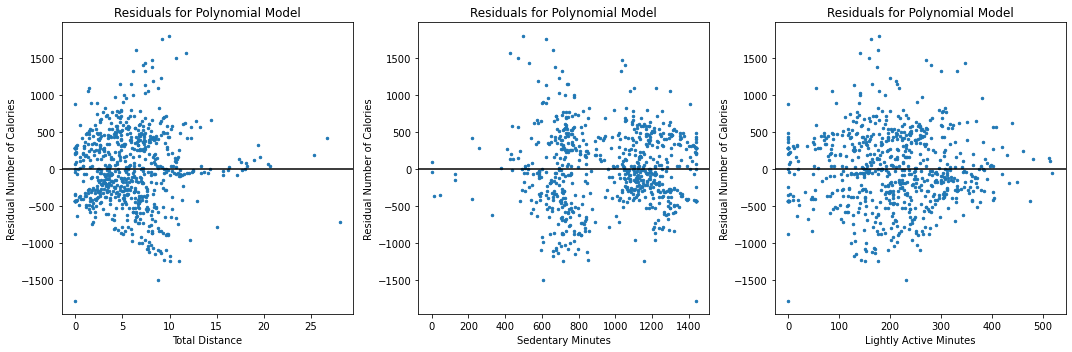

In [56]:
# just some residual plots

x_matrix = transformer.fit_transform(Xtrain)
prediction = regression.predict(x_matrix)
residual = Ytrain - prediction

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].scatter(Xtrain.TotalDistance, residual, s = 6)
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel("Residual Number of Calories")
ax[0].set_title("Residuals for Polynomial Model")
ax[0].axhline(0, color='k')

ax[1].scatter(Xtrain.SedentaryMinutes, residual, s = 6)
ax[1].set_xlabel('Sedentary Minutes')
ax[1].set_ylabel("Residual Number of Calories")
ax[1].set_title("Residuals for Polynomial Model")
ax[1].axhline(0, color='k')

ax[2].scatter(Xtrain.LightlyActiveMinutes, residual, s = 6)
ax[2].set_xlabel('Lightly Active Minutes')
ax[2].set_ylabel("Residual Number of Calories")
ax[2].set_title("Residuals for Polynomial Model")
ax[2].axhline(0, color='k')

plt.tight_layout()